In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score
from scipy import stats

# Load dataset
data = pd.read_csv(r'C:\Users\PMLS\OneDrive\Desktop\winequality-red.csv')

# Data cleaning and preparation
def clean_data(df):
    # Drop rows with missing values
    df.dropna(inplace=True)
    return df

data = clean_data(data)



In [4]:
statistics = data.describe().T

# Display the descriptive statistics
print(statistics)

                       count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                           50%        75%        max  
fixed ac

Histogram

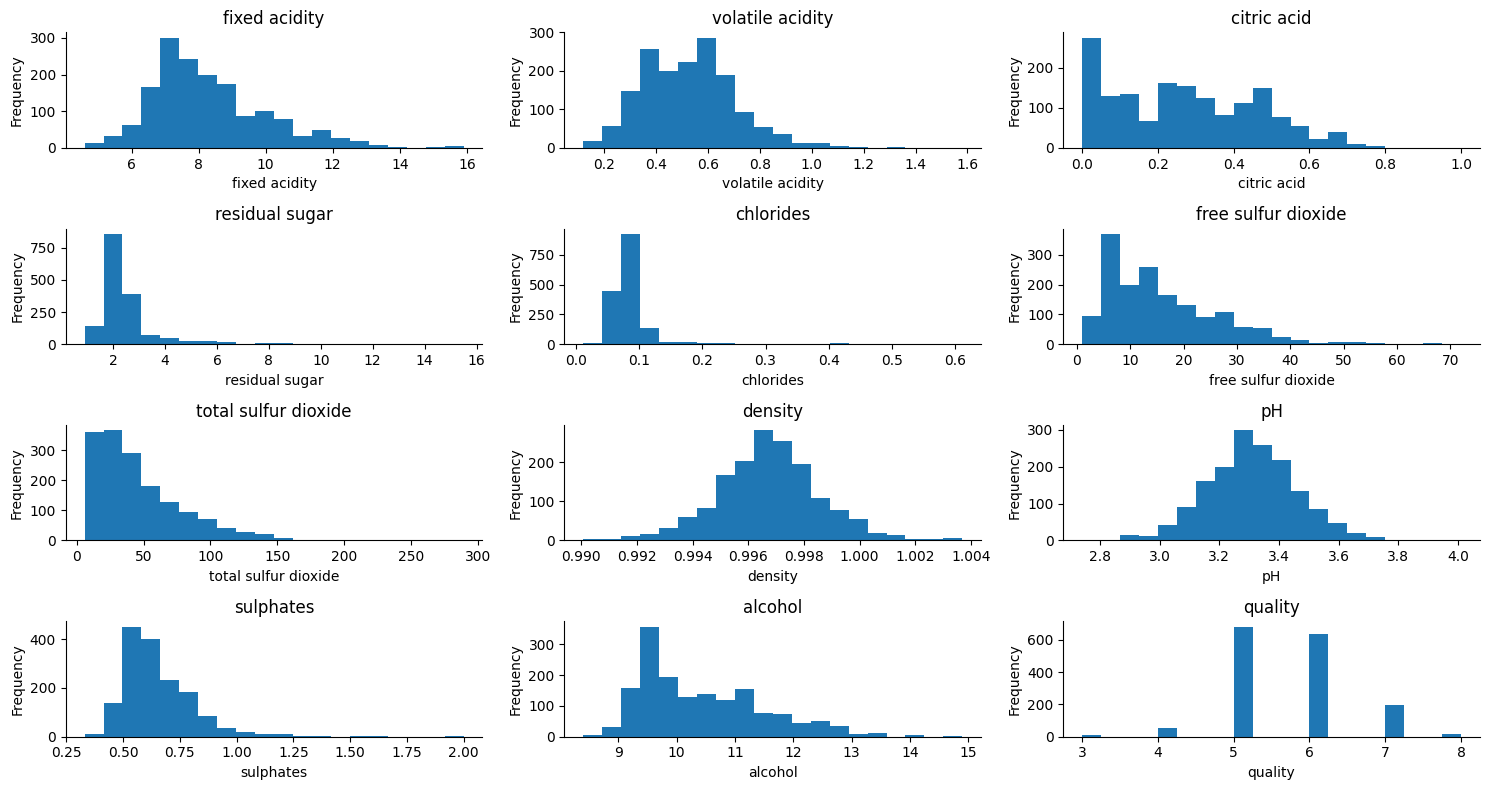

In [5]:
from matplotlib import pyplot as plt

# Assuming 'data' is your dataset

# Determine the number of rows and columns for subplots
num_cols = len(data.columns)
num_rows = (num_cols + 2) // 3  # Adjust the number of rows as needed
num_cols_per_row = min(num_cols, 3)

# Create subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols_per_row, figsize=(5*num_cols_per_row, 2*num_rows))

# Plot histograms for all columns
for i, column in enumerate(data.columns):
    row = i // num_cols_per_row
    col = i % num_cols_per_row
    data[column].plot(kind='hist', bins=20, ax=axs[row, col])
    axs[row, col].set_title(column)
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].spines[['top', 'right']].set_visible(False)

# Adjust layout
plt.tight_layout()
plt.show()


Scatter Plot

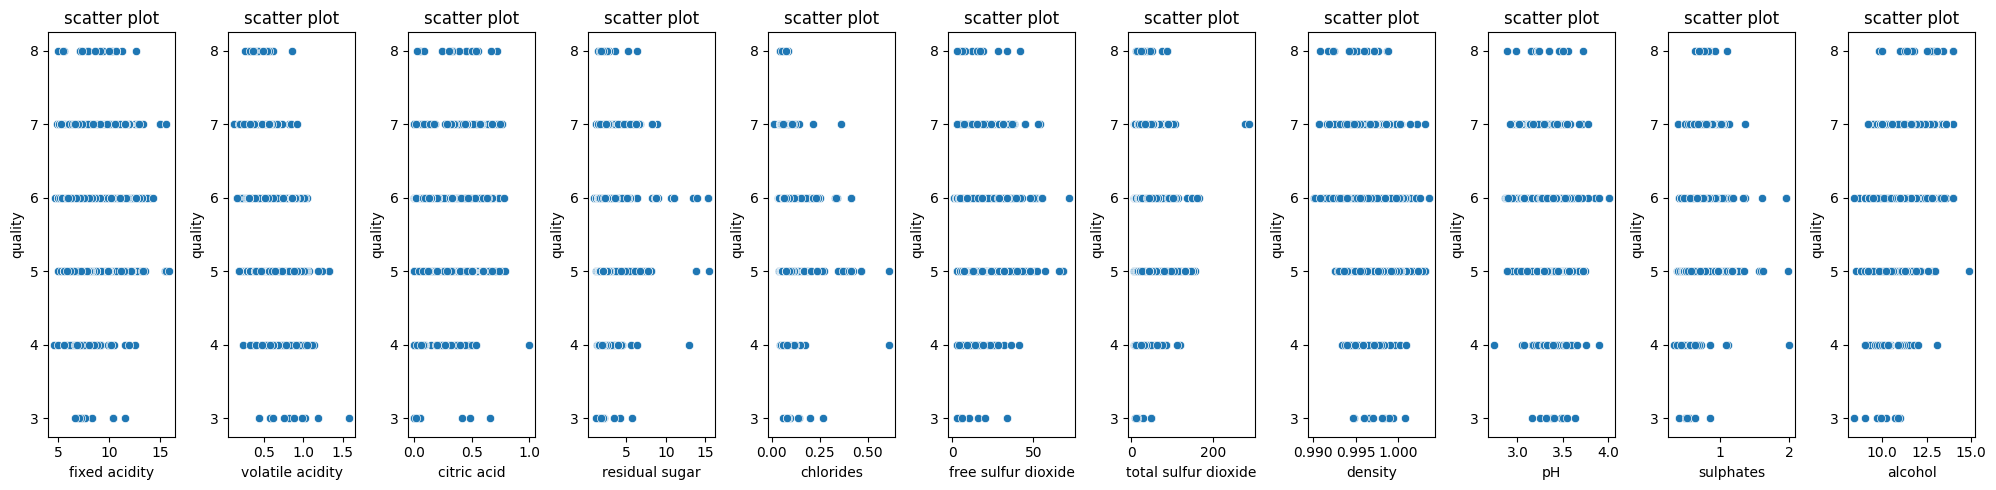

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset

# Define the target feature for scatter plots
target_feature = 'quality'

# Function to create scatter plots for each feature against the target feature
def plot_scatterplots(data, target_feature):
    fig, axs = plt.subplots(nrows=1, ncols=len(data.columns) - 1, figsize=(20, 5))

    features = [col for col in data.columns if col != target_feature]

    for i, column in enumerate(features):
        sns.scatterplot(x=data[column], y=data[target_feature], ax=axs[i])
        axs[i].set_title("scatter plot")
        axs[i].set_xlabel(column)
        axs[i].set_ylabel(target_feature)

    plt.tight_layout()  # Adjust the layout to avoid overlapping
    plt.show()

# Generate scatter plots
plot_scatterplots(data, target_feature)


Heatmap

<Axes: >

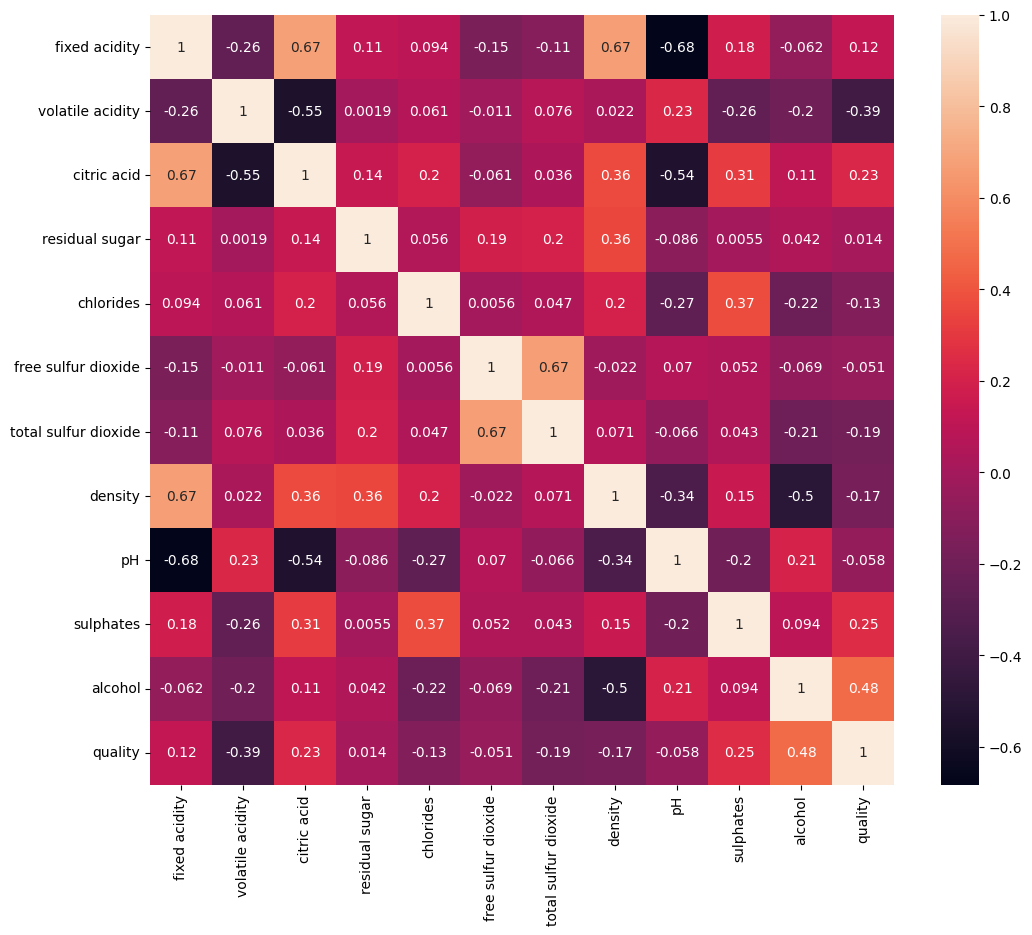

In [7]:
plt.figure(figsize = (12, 10))
sns.heatmap(data.corr(), annot = True)

Elbow plot

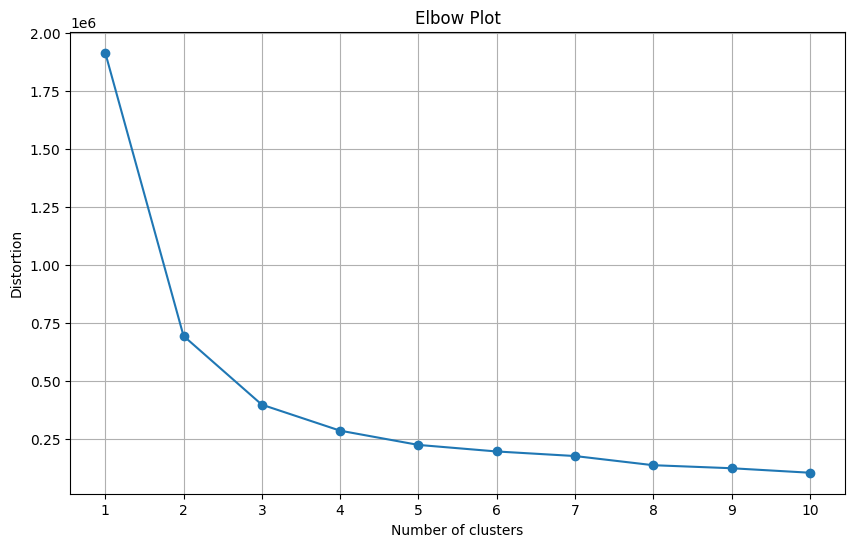

In [8]:
from sklearn.cluster import KMeans
import numpy as np

# Function to create elbow plot to find optimal number of clusters
def elbow_plot(data, max_clusters=10):
    distortions = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_clusters + 1), distortions, marker='o')
    plt.title('Elbow Plot')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.xticks(np.arange(1, max_clusters + 1))
    plt.grid(True)
    plt.show()

# Example usage:
# Assuming 'data' contains the features you want to cluster
elbow_plot(data)


In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA  #
ss = StandardScaler()  # StandardScaler to standardize data
X = ss.fit_transform(data)  # Standardize
#reduce dimensions
pca = PCA(n_components = 2)
Xpca = pca.fit_transform(X)

In [10]:
# Fit KMeans
kmeans = KMeans(n_clusters = 2, random_state = 0)  # KMeans : 2 clusters
kmeans.fit(Xpca)  # Fit the model
pred = kmeans.predict(Xpca)

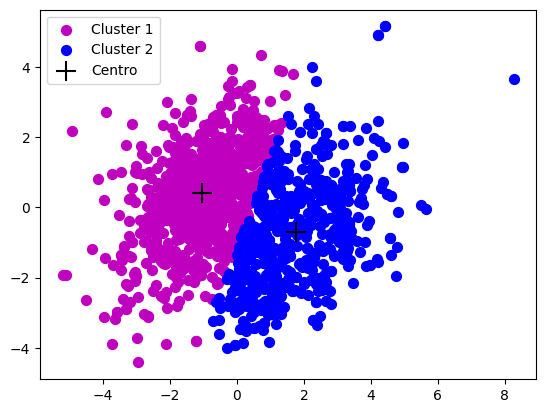

In [12]:
cores = ['m', 'b'] # Cores
for i in range(len(cores)):
    # Plotando os pontos de dados para cada cluster
    plt.scatter(Xpca[pred == i, 0], Xpca[pred == i, 1],
                s = 50, c = cores[i], label = 'Cluster ' + str(i+1))

# Plotando os centróides dos clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s = 200, marker = '+', c = 'black', label = 'Centro')

plt.legend()
plt.show()


In [13]:
data['cluster'] = pred
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV  
X = data.drop('cluster', axis=1)
y = data['cluster']

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier() # Intanciar o RandomForest

# define some grid values ​​for the parameters
grid_values = {'max_depth': [None, 10, 5, 3, 1],
               'min_samples_leaf': [1, 5, 10, 20]}

grid_rf = GridSearchCV(rf, param_grid = grid_values, cv = 10, scoring = 'accuracy') # Initaite GridSearchCV
grid_rf.fit(xtrain, ytrain) 
grid_rf.best_params_ # Print the best parameters

{'max_depth': None, 'min_samples_leaf': 1}

In [16]:
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(max_features = 'sqrt',
                            max_depth = None,
                            min_samples_leaf = 1,
                            random_state = 0)

rf.fit(xtrain, ytrain) # fittting
ypred = rf.predict(xtest) # Predict
accuracy = accuracy_score(ytest, ypred)

In [17]:
print('accurcay on training : ', accuracy_score(ytrain, rf.predict(xtrain)))
print('Accuracy on Testing: ', accuracy_score(ytest, ypred))

accurcay on training :  1.0
Accuracy on Testing:  0.971875


c:\Users\PMLS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
